In [1]:
import pandas as pd

#set seaborn color pallete
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_palette('plasma')
pal = sns.set_palette('plasma')

# This module displays Markdown and helps with visability within Juypter Notebooks
from IPython.display import Markdown, display, HTML

# Import models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

# Import Metrics
from sklearn.metrics import (
    classification_report, confusion_matrix,
    recall_score, plot_confusion_matrix)

#Disable Warnings 
import warnings
warnings.filterwarnings('ignore')

#Import functions
import acquire as a
import prepare as p
import explore as e
import model as m 

# Acquire and Prepare

In [2]:
df, revert_key, replace_key = p.wrangle_data()
df.head()

,qkey,device_type,language,form,attitude,avg_family,happen_general,happen_health,happen_race,happen_usa,...,family_income_three_categories,registered_to_vote,political_views,internet_access,volunteer,weight,is_pes,pes_val,is_very_pes,is_very_opt
0,100363,Mobile phone,English,Form 1,Somewhat optimistic,Get worse,The U.S. economy will be STRONGER,Health care will be MORE affordable,Race relations will IMPROVE,The U.S. will be MORE important in the world,...,"$75,000+",You are ABSOLUTELY CERTAIN that you are regist...,Liberal,Internet User,No,0.599006,0,1,0,0
1,101224,Mobile phone,English,Form 1,Somewhat optimistic,Get better,The U.S. economy will be STRONGER,Health care will be LESS affordable,Race relations will IMPROVE,The U.S. will be MORE important in the world,...,"$30-$74,999",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,Yes,0.292981,0,1,0,0
2,101437,Desktop,English,Form 1,Somewhat pessimistic,Get worse,The U.S. economy will be WEAKER,Health care will be LESS affordable,Race relations will GET WORSE,The U.S. will be LESS important in the world,...,"<$30,000",You are ABSOLUTELY CERTAIN that you are regist...,Conservative,Internet User,No,0.418871,1,2,0,0
3,102130,Mobile phone,English,Form 1,Somewhat optimistic,Stay about the same,The U.S. economy will be WEAKER,Health care will be LESS affordable,Race relations will IMPROVE,The U.S. will be LESS important in the world,...,Don't know/Refused,You are ABSOLUTELY CERTAIN that you are regist...,Moderate,Non Internet User,Yes,0.342058,0,1,0,0
4,103094,Mobile phone,English,Form 1,Somewhat optimistic,Stay about the same,Refused,Health care will be LESS affordable,Refused,The U.S. will be LESS important in the world,...,"<$30,000",You are NOT registered to vote at your current...,Liberal,Internet User,Yes,0.329465,0,1,0,0


# Split Male/Female

In [14]:
males_df = df[df.sex == "Male"]
females_df = df[df.sex == "Female"]

In [33]:
#Make Dummies 
males_dummies = pd.get_dummies(males_df, drop_first = True)
females_dummies = pd.get_dummies(females_df, drop_first = True)

# Train, Validate, and Test Split

In [15]:
train_m, validate_m, test_m = p.train_validate_test_split(males_df, 'is_pes')

In [16]:
train_f, validate_f, test_f = p.train_validate_test_split(females_df, 'is_pes')

In [34]:
train_dummies_m, validate_dummies_m, test_dummies_m = p.train_validate_test_split(males_dummies, 'is_pes')

In [35]:
train_dummies_f, validate_dummies_f, test_dummies_f = p.train_validate_test_split(females_dummies, 'is_pes')

# Explore by Question 

## Most Important Issues Females by Question

In [21]:
# Generate object
obj_f = e.generate_and_return_obj(train_f)
# Examine the chi2 results and return the most signficant values from them
issues_female = obj_f.chi2_df.sort_values(by='p_val')
issues_female.head(10)

,chi2,p_val,deg_free,expected_freq
happen_general,84.582240,4.297342e-19,2,"[[20.48847926267281, 15.511520737327189], [91...."
happen_child_f2,60.152566,8.670341e-14,2,"[[46.2962962962963, 33.7037037037037], [67.708..."
happen_race,58.865096,1.650467e-13,2,"[[104.71889400921658, 79.28110599078342], [116..."
happen_pub_ed,53.248030,2.737394e-12,2,"[[23.903225806451612, 18.096774193548388], [13..."
job_benefits,55.415261,5.599109e-12,3,"[[96.18202764976958, 72.81797235023042], [56.3..."
job_security,55.028598,6.770388e-12,3,"[[90.49078341013825, 68.50921658986175], [114...."
elder_care,42.063426,7.345869e-10,2,"[[59.1889400921659, 44.8110599078341], [186.67..."
happen_health,40.303906,1.770590e-09,2,"[[149.110599078341, 112.88940092165899], [77.4..."
envir_50yrs,43.518288,1.910100e-09,3,"[[64.3110599078341, 48.6889400921659], [33.009..."
worry_government,45.153076,3.694997e-09,4,"[[99.59677419354838, 75.40322580645162], [4.55..."


<AxesSubplot:xlabel='p_val'>

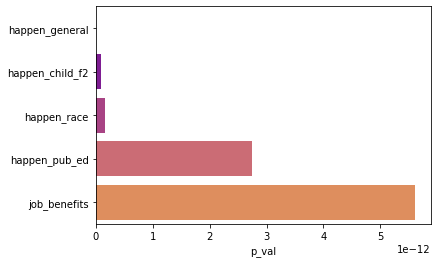

In [27]:
sns.barplot(y = issues_female[0:5].index, x = issues_female[0:5].p_val)

## Most Important Issues Males by Question

In [31]:
# Generate object
obj_m = e.generate_and_return_obj(train_m)
# Examine the chi2 results and return the most signficant values from them
issues_male = obj_m.chi2_df.sort_values(by='p_val').head(10)
issues_male.head(10)

,chi2,p_val,deg_free,expected_freq
happen_general,97.069095,8.350527e-22,2,"[[10.852272727272727, 9.147727272727273], [75...."
happen_pub_ed,53.154387,2.868611e-12,2,"[[12.480113636363637, 10.519886363636363], [10..."
happen_politics,49.322163,1.949074e-11,2,"[[10.852272727272727, 9.147727272727273], [59...."
happen_race,47.459004,4.947755e-11,2,"[[75.42329545454545, 63.57670454545455], [101...."
job_security,38.558751,4.237148e-09,2,"[[66.19886363636364, 55.80113636363637], [104...."
debt_30yrs,39.489327,1.367064e-08,3,"[[4.340909090909091, 3.659090909090909], [20.6..."
happen_wealthgap,34.767853,2.820049e-08,2,"[[10.309659090909092, 8.690340909090908], [33...."
happen_65up_f1,34.590975,3.080812e-08,2,"[[40.02040816326531, 33.97959183673469], [61.1..."
happen_usa,33.783649,4.612897e-08,2,"[[12.480113636363637, 10.519886363636363], [11..."
share_americans_in_middle_class,36.873429,4.894022e-08,3,"[[100.38352272727273, 84.61647727272727], [50...."


<AxesSubplot:xlabel='p_val'>

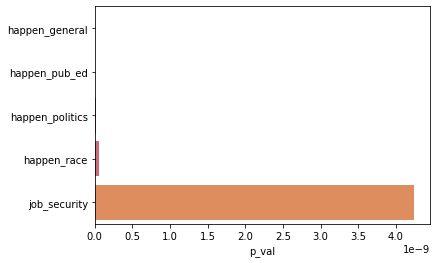

In [40]:
sns.barplot(y = issues_male[0:5].index, x = issues_male[0:5].p_val)

## Gender Differences by Question

In [45]:
important_for_females = issues_female[issues_female.p_val < 0.05]
important_for_males = issues_male[issues_male.p_val < 0.05]

In [47]:
important_for_females_list = important_for_females.index.to_list()
important_for_females_list

['happen_general',
 'happen_child_f2',
 'happen_race',
 'happen_pub_ed',
 'job_benefits',
 'job_security',
 'elder_care',
 'happen_health',
 'envir_50yrs',
 'worry_government',
 'worry_leaders',
 'happen_politics',
 'happen_usa',
 'happen_terroist',
 'share_americans_in_middle_class',
 'worry_public_schools',
 'happen_wealthgap',
 'happen_65up_f1',
 'worry_economy',
 'worry_morals',
 'fut_marriage',
 'ethnic_conflict',
 'happen_rel',
 'share_americans_in_lower_class',
 'happen_china',
 'happen_energy',
 'robot_replacement_increase_inequality',
 'debt_30yrs',
 'gov_in_wash',
 'major_corps',
 'happen_alzheimers',
 'automation_good_or_bad',
 'rel_groups',
 'happen_anti_semitism',
 'robot_replacement_means_better_jobs_for_humans',
 'pop_growth',
 'legal_immigration_levels',
 'priority_avoid_tax_increase',
 'military',
 'race_and_ethnicity',
 'evangelical_christian',
 'schools',
 'fut_abortion',
 'harass_personal_exp',
 'ethnic_customs',
 'fut_kids',
 'family_income_three_categories',
 'his

In [48]:
important_for_males_list = important_for_males.index.to_list()
important_for_males_list

['happen_general',
 'happen_pub_ed',
 'happen_politics',
 'happen_race',
 'job_security',
 'debt_30yrs',
 'happen_wealthgap',
 'happen_65up_f1',
 'happen_usa',
 'share_americans_in_middle_class']

In [50]:
len(important_for_females), len(important_for_males)

(48, 10)

In [55]:
important_for_females_but_not_males = set(important_for_females_list).difference(set(important_for_males_list))
important_for_females_but_not_males

{'automation_good_or_bad',
 'elder_care',
 'envir_50yrs',
 'ethnic_conflict',
 'ethnic_customs',
 'evangelical_christian',
 'family_income_three_categories',
 'fut_abortion',
 'fut_kids',
 'fut_marriage',
 'gov_in_wash',
 'happen_alzheimers',
 'happen_anti_semitism',
 'happen_child_f2',
 'happen_china',
 'happen_energy',
 'happen_health',
 'happen_rel',
 'happen_terroist',
 'harass_personal_exp',
 'hispanic_or_latino',
 'job_benefits',
 'legal_immigration_levels',
 'major_corps',
 'military',
 'pop_growth',
 'priority_avoid_tax_increase',
 'race_and_ethnicity',
 'rel_groups',
 'robot_replacement_increase_inequality',
 'robot_replacement_means_better_jobs_for_humans',
 'schools',
 'share_americans_in_lower_class',
 'worry_economy',
 'worry_government',
 'worry_leaders',
 'worry_morals',
 'worry_public_schools'}

In [56]:
important_for_males_but_not_females = set(important_for_males_list).difference(set(important_for_females_list))
important_for_males_but_not_females

set()

# Explore by Response

## Most Import Issues for Females by Reponse

In [64]:
# Generate object
obj_f = e.generate_and_return_obj(train_dummies_f)
# Examine the chi2 results and return the most signficant values from them
issues_female_responses = obj_f.chi2_df.sort_values(by='p_val')
issues_female_responses.head(10)

,chi2,p_val,deg_free,expected_freq
attitude_Somewhat pessimistic,263.867025,2.463885e-59,1,"[[168.46082949308754, 127.53917050691244], [78..."
avg_family_Get worse,103.524515,2.571920e-24,1,"[[128.05299539170508, 96.94700460829493], [118..."
happen_general_The U.S. economy will be WEAKER,78.071526,9.937617e-19,1,"[[112.11751152073732, 84.88248847926268], [134..."
happen_general_The U.S. economy will be STRONGER,74.006298,7.786820e-18,1,"[[155.3709677419355, 117.62903225806451], [91...."
attitude_Very pessimistic,70.366478,4.924975e-17,1,"[[219.11290322580646, 165.88709677419354], [27..."
happen_pub_ed_The public education system will GET WORSE,48.397465,3.480178e-12,1,"[[116.67050691244239, 88.32949308755761], [130..."
job_security_Less job security,46.012983,1.174719e-11,1,"[[132.60599078341014, 100.39400921658986], [11..."
happen_pub_ed_The public education system will IMPROVE,45.590718,1.457306e-11,1,"[[154.23271889400922, 116.76728110599079], [92..."
happen_race_Race relations will IMPROVE,44.632848,2.376705e-11,1,"[[130.89861751152074, 99.10138248847926], [116..."
attitude_Very optimistic,42.753478,6.209139e-11,1,"[[217.40552995391704, 164.59447004608296], [29..."


<AxesSubplot:xlabel='p_val'>

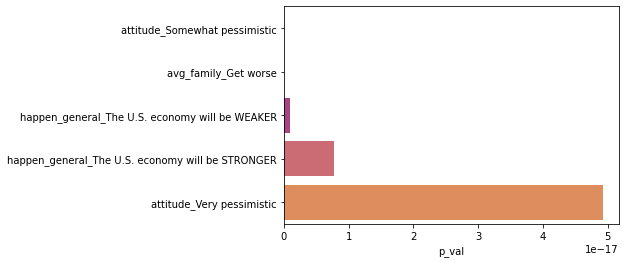

In [65]:
sns.barplot(y = issues_female_responses[0:5].index, x = issues_female_responses[0:5].p_val)

## Most Important Issues Males by Reponse

In [68]:
# Generate object
obj_m = e.generate_and_return_obj(train_dummies_m)
# Examine the chi2 results and return the most signficant values from them
issues_male_responses = obj_m.chi2_df.sort_values(by='p_val')
issues_male_responses.head(10)

,chi2,p_val,deg_free,expected_freq
attitude_Somewhat pessimistic,204.644586,2.024584e-46,1,"[[127.51420454545455, 107.48579545454545], [63..."
avg_family_Get worse,116.665604,3.397884e-27,1,"[[112.86363636363636, 95.13636363636364], [78...."
happen_general_The U.S. economy will be WEAKER,92.174165,7.937426e-22,1,"[[86.81818181818181, 73.18181818181819], [104...."
happen_general_The U.S. economy will be STRONGER,86.452819,1.431111e-20,1,"[[115.0340909090909, 96.9659090909091], [75.96..."
attitude_Very pessimistic,57.183218,3.970447e-14,1,"[[167.125, 140.875], [23.875, 20.125]]"
happen_pub_ed_The public education system will GET WORSE,51.323950,7.831433e-13,1,"[[90.07386363636364, 75.92613636363636], [100...."
happen_politics_The country will be MORE politically divided,47.106485,6.723286e-12,1,"[[70.53977272727273, 59.46022727272727], [120...."
happen_pub_ed_The public education system will IMPROVE,42.443417,7.275688e-11,1,"[[113.40625, 95.59375], [77.59375, 65.40625]]"
happen_politics_The country will be LESS politically divided,41.213619,1.364684e-10,1,"[[131.3125, 110.6875], [59.6875, 50.3125]]"
debt_30yrs_Grow larger,36.940729,1.217753e-09,1,"[[54.80397727272727, 46.19602272727273], [136...."


<AxesSubplot:xlabel='p_val'>

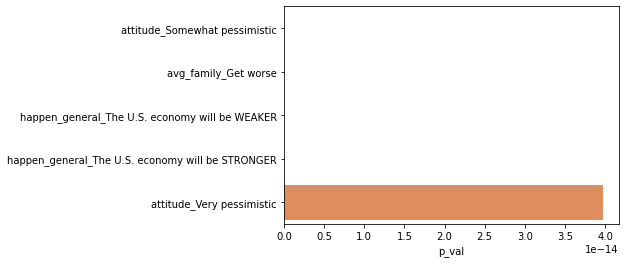

In [69]:
sns.barplot(y = issues_male_responses[0:5].index, x = issues_male_responses[0:5].p_val)

## Gender Differences by Response

In [70]:
important_for_females_responses = issues_female_responses[issues_female_responses.p_val < 0.05]
important_for_males_responses = issues_male_responses[issues_male_responses.p_val < 0.05]

In [71]:
important_for_females_responses_list = important_for_females_responses.index.to_list()
important_for_females_responses_list 

['attitude_Somewhat pessimistic',
 'avg_family_Get worse',
 'happen_general_The U.S. economy will be WEAKER',
 'happen_general_The U.S. economy will be STRONGER',
 'attitude_Very pessimistic',
 'happen_pub_ed_The public education system will GET WORSE',
 'job_security_Less job security',
 'happen_pub_ed_The public education system will IMPROVE',
 'happen_race_Race relations will IMPROVE',
 'attitude_Very optimistic',
 'elder_care_LESS prepared financially for retirement than older adults today',
 'worry_government_Very worried',
 'worry_leaders_Very worried',
 'job_benefits_Not as good as they are now',
 'job_benefits_Better than they are now',
 'happen_politics_The country will be MORE politically divided',
 'happen_health_Health care will be MORE affordable',
 'happen_usa_The U.S. will be LESS important in the world',
 'happen_child_f2_Children will have a WORSE standard of living',
 'envir_50yrs_Worse than it is now',
 'happen_usa_The U.S. will be MORE important in the world',
 'env

In [72]:
important_for_males_responses_list = important_for_males_responses.index.to_list()
important_for_males_responses_list 

['attitude_Somewhat pessimistic',
 'avg_family_Get worse',
 'happen_general_The U.S. economy will be WEAKER',
 'happen_general_The U.S. economy will be STRONGER',
 'attitude_Very pessimistic',
 'happen_pub_ed_The public education system will GET WORSE',
 'happen_politics_The country will be MORE politically divided',
 'happen_pub_ed_The public education system will IMPROVE',
 'happen_politics_The country will be LESS politically divided',
 'debt_30yrs_Grow larger',
 'happen_race_Race relations will IMPROVE',
 'job_security_Less job security',
 'attitude_Very optimistic',
 'happen_usa_The U.S. will be LESS important in the world',
 'happen_wealthgap_The gap between the rich and the poor will GET SMALLER',
 'happen_wealthgap_The gap between the rich and the poor will GROW',
 'happen_usa_The U.S. will be MORE important in the world',
 'share_americans_in_lower_class_Increase',
 'elder_care_LESS prepared financially for retirement than older adults today',
 'worry_economy_Not too worried',

In [73]:
important_for_females_but_not_males_responses = set(important_for_females_responses_list).difference(set(important_for_males_responses_list))
important_for_females_but_not_males_responses

{'age_50-64',
 'age_impact_A very bad thing',
 'ethnic_conflict_Not much of an impact',
 'ethnic_impact1_A very bad thing',
 'family_income_three_categories_<$30,000',
 'fut_abortion_Legal with no restrictions',
 'fut_marriage_Less likely to get married than people are now',
 'gov_in_wash_A very negative impact',
 'happen_alzheimers_Will probably happen',
 'happen_rel_Religion will be ABOUT AS important as it is now',
 'happen_rel_Religion will become LESS important',
 'harass_fired_f1_Not a problem',
 'harass_personal_exp_Yes',
 'hispanic_or_latino_Yes',
 'legal_immigration_levels_Maintained at current levels',
 'marital_status_Living with a partner',
 'military_A very negative impact',
 'priority_avoid_tax_increase_Should not be done',
 'priority_reduce_military_A top priority',
 'race_Black or African American',
 'race_and_ethnicity_Hispanic',
 'race_and_ethnicity_White non-Hispanic',
 'religion_Nothing in particular',
 'state_local_A very positive impact',
 'worry_climate_Very worr

In [74]:
important_for_males_but_not_females_responses = set(important_for_males_responses_list).difference(set(important_for_females_responses_list))
important_for_males_but_not_females_responses

{'age_impact_A somewhat good thing',
 'automation_good_or_bad_Mostly hurt American workers',
 'church_attendance_Never',
 'church_attendance_Once a week',
 'debt_30yrs_Be reduced',
 'ethnic_customs_Strengthen American customs and values',
 'family_income_nine_categories_Less than $10,000',
 'happen_70yr_labor_Will definitely not happen',
 'happen_alzheimers_Will definitely happen',
 'happen_anti_semitism_Will definitely not happen',
 'happen_anti_semitism_Will probably not happen',
 'happen_terroist_Will definitely not happen',
 'happen_terroist_Will probably happen',
 'highest_education_six_categories_Postgraduate',
 'inter_mar_A somewhat good thing',
 'pop_growth_Minor problem',
 'priority_reducing_spending_infrastructure_An important, but not a top priority',
 'registered_to_vote_You are NOT registered to vote at your current address',
 'rel_groups_A very positive impact',
 'replacement_by_robots_good_or_bad_A very bad thing for the country',
 'sci_tech_A somewhat positive impact',


# Modeling by Gender

In [113]:
pd.set_option('display.max_colwidth', None)

## Female

In [114]:
females = e.generate_and_return_obj(females_df)
females.X_train_dummies.head()

,qkey,weight,device_type_Mobile phone,device_type_Tablet,language_Spanish,form_Form 2,happen_general_The U.S. economy will be STRONGER,happen_general_The U.S. economy will be WEAKER,happen_health_Health care will be MORE affordable,happen_health_Refused,...,registered_to_vote_You are NOT registered to vote at your current address,"registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed",political_views_Liberal,political_views_Moderate,political_views_Refused,political_views_Very conservative,political_views_Very liberal,internet_access_Non Internet User,volunteer_Refused,volunteer_Yes
2041,201801133729,0.706203,0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
271,605493,1.106863,1,0,0,1,0,1,1,0,...,0,1,0,0,0,0,1,0,0,1
1956,201801124344,0.194872,1,0,0,1,0,1,0,0,...,1,0,0,1,0,0,0,0,0,1
221,317005,1.005385,0,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
719,201501623519,0.322398,0,0,0,1,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0


In [123]:
print(f'Baseline Accuracy: {round((1 - females.y_train_dummies.mean())* 100, 2)}%')

Baseline Accuracy: 56.9%


In [124]:
# Create a dataframe to store and compare our models' performances
score_df_female = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df_female

,model_name,train_score,validate_score


In [130]:
# This function takes in the max_depth value of our tree
# returns tree parameters and a corresponding name
forest_list, forest_name_list = m.random_forest_models(10, 10, 'including_all')

In [131]:
#Append results to score_df
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df_female = m.test_a_model(females.X_train_dummies, females.y_train_dummies, females.X_validate_dummies, females.y_validate_dummies, model, name, score_df_female)

In [132]:
score_df_female.sort_values(by = "validate_score", ascending = False).head(10)

,model_name,train_score,validate_score
88,including_all_features_random_forest_min_samples_leaf_5_depth_5,0.882581,0.777778
11,including_all_features_random_forest_min_samples_leaf_4_depth_1,0.774194,0.777778
98,including_all_features_random_forest_min_samples_leaf_6_depth_5,0.873548,0.774775
110,including_all_features_random_forest_min_samples_leaf_7_depth_7,0.765161,0.774775
13,including_all_features_random_forest_min_samples_leaf_4_depth_3,0.823226,0.774775
48,including_all_features_random_forest_min_samples_leaf_7_depth_8,0.789677,0.771772
25,including_all_features_random_forest_min_samples_leaf_5_depth_5,0.887742,0.771772
65,including_all_features_random_forest_min_samples_leaf_3_depth_2,0.780645,0.771772
24,including_all_features_random_forest_min_samples_leaf_5_depth_4,0.877419,0.771772
68,including_all_features_random_forest_min_samples_leaf_3_depth_5,0.873548,0.771772


### Feature Importance

In [134]:
#Make model
rf_depth_5_leaf_5 = RandomForestClassifier(min_samples_leaf=5, max_depth=5)
#Fit Model
rf_depth_5_leaf_5.fit(females.X_train_dummies, females.y_train_dummies)

RandomForestClassifier(max_depth=5, min_samples_leaf=5)

In [137]:
#Create data frame of feature importances, using our selected model
feature_importances = pd.DataFrame(rf_depth_5_leaf_5.feature_importances_, index = females.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances = feature_importances.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances.columns.names = ['category']

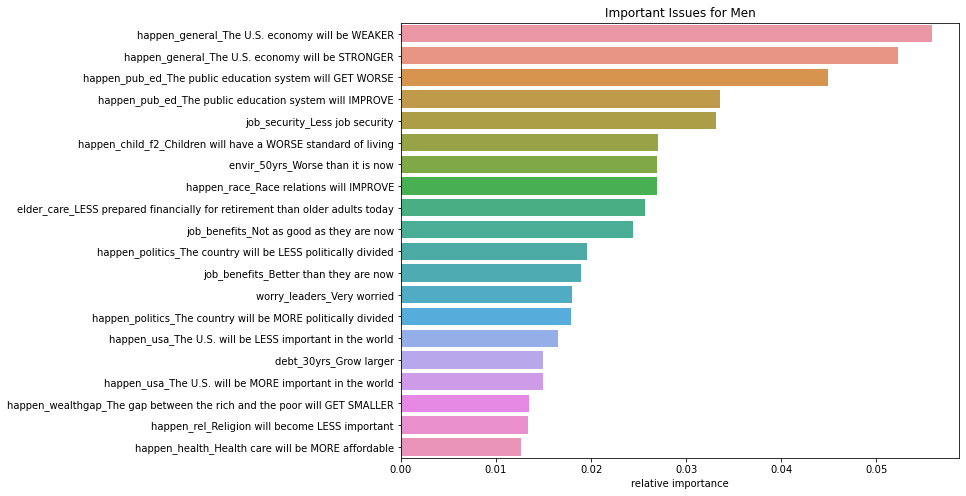

In [138]:
#Plot the most relevant features
plt.figure(figsize=(10,8))
relative_importances = sns.barplot(x=feature_importances['relative importance'][0:20], y=feature_importances.index[0:20]).set(title="Important Issues for Men")

## Males

In [76]:
males = e.generate_and_return_obj(males_df)
males.X_train_dummies.head()

,qkey,weight,device_type_Mobile phone,device_type_Tablet,language_Spanish,form_Form 2,happen_general_The U.S. economy will be STRONGER,happen_general_The U.S. economy will be WEAKER,happen_health_Health care will be MORE affordable,happen_health_Refused,...,registered_to_vote_You are NOT registered to vote at your current address,"registered_to_vote_You are PROBABLY registered, but there is a chance your registration has lapsed",political_views_Liberal,political_views_Moderate,political_views_Refused,political_views_Very conservative,political_views_Very liberal,internet_access_Non Internet User,volunteer_Refused,volunteer_Yes
1986,201801127686,2.234676,0,0,0,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,0
75,169864,0.490990,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
705,201501618307,2.765590,0,1,0,0,0,1,0,0,...,0,0,0,1,0,0,0,1,0,0
224,319198,0.236477,1,0,0,0,0,1,1,0,...,0,0,1,0,0,0,0,0,0,1
605,201501192451,0.630844,1,0,0,0,1,0,1,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
print(f'Baseline Accuracy: {round(1.00 - males.y_train_dummies.mean(), 4)* 100}%')

Baseline Accuracy: 54.36%


In [105]:
# Create a dataframe to store and compare our models' performances
score_df_male = pd.DataFrame(columns = ['model_name', 'train_score', 'validate_score'])
score_df_male

,model_name,train_score,validate_score


In [106]:
# This function takes in the max_depth value of our tree
# returns tree parameters and a corresponding name
forest_list, forest_name_list = m.random_forest_models(10, 10, 'including_all')

In [107]:
#Append results to score_df
#Append results to score_df
for model, name in zip(forest_list, forest_name_list):
    score_df_male = m.test_a_model(males.X_train_dummies, males.y_train_dummies, males.X_validate_dummies, males.y_validate_dummies, model, name, score_df_male)

In [108]:
score_df_male.sort_values(by = "validate_score", ascending = False).head(10)

,model_name,train_score,validate_score
24,including_all_features_random_forest_min_samples_leaf_5_depth_4,0.893819,0.785978
43,including_all_features_random_forest_min_samples_leaf_7_depth_3,0.890650,0.785978
12,including_all_features_random_forest_min_samples_leaf_4_depth_2,0.851030,0.785978
3,including_all_features_random_forest_min_samples_leaf_3_depth_3,0.835182,0.782288
33,including_all_features_random_forest_min_samples_leaf_6_depth_3,0.896989,0.782288
52,including_all_features_random_forest_min_samples_leaf_8_depth_2,0.874802,0.782288
49,including_all_features_random_forest_min_samples_leaf_7_depth_9,0.844691,0.782288
23,including_all_features_random_forest_min_samples_leaf_5_depth_3,0.890650,0.782288
62,including_all_features_random_forest_min_samples_leaf_9_depth_2,0.874802,0.778598
38,including_all_features_random_forest_min_samples_leaf_6_depth_8,0.817750,0.778598


### Feature Importance

In [109]:
#Make model
rf_depth_4_leaf_5 = RandomForestClassifier(min_samples_leaf=5, max_depth=4)
#Fit Model
rf_depth_4_leaf_5.fit(males.X_train_dummies, males.y_train_dummies)

RandomForestClassifier(max_depth=4, min_samples_leaf=5)

In [111]:
#Create data frame of feature importances, using our selected model
feature_importances = pd.DataFrame(rf_depth_4_leaf_5.feature_importances_, index = o.X_train_dummies.columns, columns = [ "relative importance"])
#Sort the data frame by the relative importance of each feature
feature_importances = feature_importances.sort_values(by = ['relative importance'], ascending = False)
#Rename the index column "category"
feature_importances.columns.names = ['category']

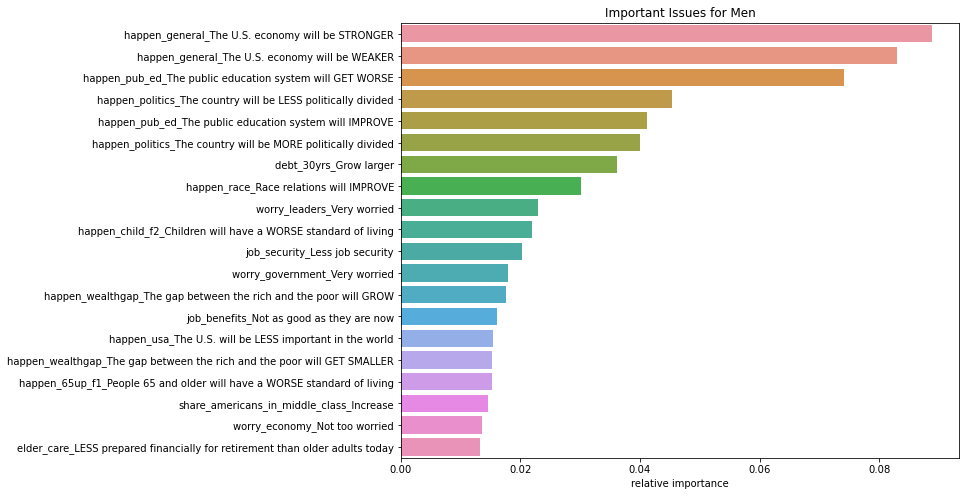

In [112]:
#Plot the most relevant features
plt.figure(figsize=(10,8))
relative_importances = sns.barplot(x=feature_importances['relative importance'][0:20], y=feature_importances.index[0:20]).set(title="Important Issues for Men")